<a href="https://colab.research.google.com/github/davidpirts/CIFAR10-without-convolutions/blob/master/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer vision with Keras, OpenCV and Tesseract**



## **Tesseract**

In [1]:
# install Tesseract
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,590 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
# import the required libraries
from PIL import Image
import pytesseract
from google.colab.patches import cv2
from google.colab.patches import cv2_imshow

In [3]:
# (We've already mounted the drive manually from the panel on the left.) This is our working directory
!ls /content/drive/MyDrive/cv

fox_sample1.png  nutrition.png	test6.jpg
fox_sample2.png  test5.jpg	test9.jpg


In [4]:
# preprocess one of the images with cv2
image_to_ocr = cv2.imread('/content/drive/MyDrive/cv/fox_sample1.png')
preprocessed_img = cv2.cvtColor(image_to_ocr, cv2.COLOR_BGR2GRAY)
preprocessed_img = cv2.threshold(preprocessed_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
preprocessed_img = cv2.medianBlur(preprocessed_img, 3)

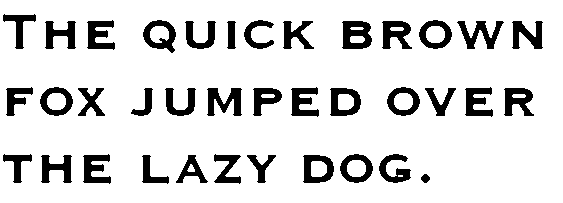

In [ ]:
# here's the preprocessed image
cv2_imshow(preprocessed_img)

In [ ]:
# save and then open with PIL
cv2.imwrite("/content/drive/MyDrive/cv/temp_img.jpg", preprocessed_img)
preprocessed_pil_img = Image.open("/content/drive/MyDrive/cv/temp_img.jpg")

In [ ]:
# Tesseract!
text_extracted = pytesseract.image_to_string(preprocessed_pil_img)
print(text_extracted)

THE QUICK BROWN
FOX JUMPED OVER
THE LAZY DOG.



## The full pipeline

In [ ]:
def extract_text(image_path):
    
    # preprocess
    image_to_ocr = cv2.imread(image_path)
    preprocessed_img = cv2.cvtColor(image_to_ocr, cv2.COLOR_BGR2GRAY)
    preprocessed_img = cv2.threshold(preprocessed_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    preprocessed_img = cv2.medianBlur(preprocessed_img, 3)
    
    # convert to PIL image
    pil_image = Image.fromarray(preprocessed_img)
    text_extracted = pytesseract.image_to_string(pil_image)

    return text_extracted


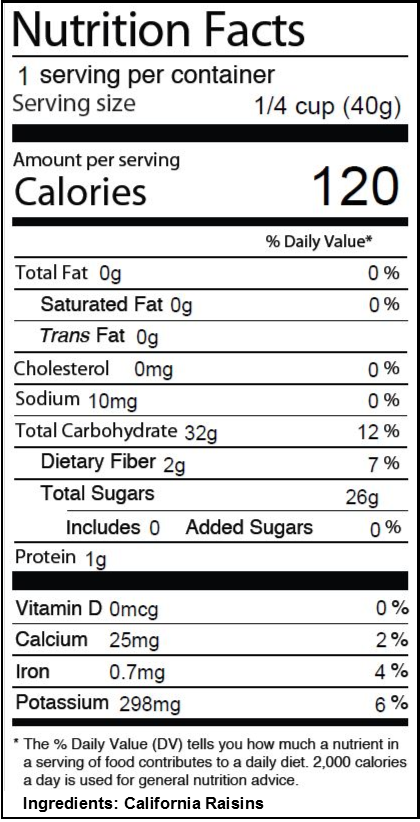

In [ ]:
image_path = "/content/drive/MyDrive/cv/nutrition.png"
cv2_imshow(cv2.imread(image_path))

In [ ]:
print(extract_text(image_path))

 

Nutrition Facts

1 serving per container
Serving size 1/4 cup (40g)
ee

Amount per serving

Calories 120

 

 

% Daily Value’
Total Fat Cg O%
Saturated Fat Cg O%
Trans Fat Cg
Cholesterol Cmg O%
Sodium 1Sng O%
Total Carbohydrate 2 12.90
Dietary Fiber 2g 7%
Total Sugars 2ég

Includes C Added Sugars o%

Protein si

Vitamin D Cmeg 0%
Calcium 25mg 2%
Iron CG ?mg 420
Potassium 2¢8n-g 6%
—_—_—

+The te Dairy Value (DV) lets you Sew much a cuinentin
AL netying cI 190d earingutes lo 9 daly diet 2.006 catones
ALday 1s used for general nulttot: adace

Ingredients California Raisins

 

   



## **Using pretrained VGG**

In [ ]:
# import the necessary keras modules
from keras.applications import VGG16, VGG19, ResNet50
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2

## VGG16

In [ ]:
# load the image of interest
img_path = "/content/drive/MyDrive/cv/test5.jpg"
img = load_img(img_path)

# resize the image to match the VGG input dims
img = img.resize((224, 224))

# convert the PIL image to array 
img_array = img_to_array(img)

# expand dimensions to include the batch dim
img_array = np.expand_dims(img_array, axis=0)

# preprocess for using the image with VGG16 (any imagenet-based model. for that matter)
img_array = imagenet_utils.preprocess_input(img_array)

In [ ]:
# load VGG16, pretrained on imagenet
pretrained_model = VGG16(weights="imagenet")

In [ ]:
# this is a 1000-dimensional array of probabilities -- decode_predictions will give the actual class
prediction = pretrained_model.predict(img_array)
actual_prediction = imagenet_utils.decode_predictions(prediction)
print("the predicted object is: " + actual_prediction[0][0][1] + ", with accuracy: " + str(actual_prediction[0][0][2]))

the predicted object is: space_shuttle, with accuracy: 0.92237544


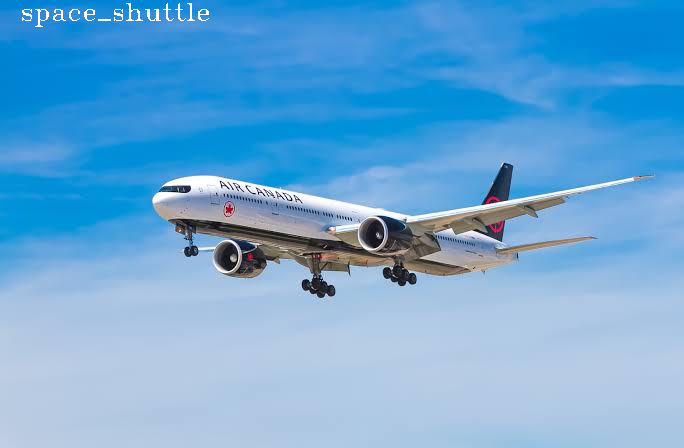

In [ ]:
# display the image, together with its label
disp_img = cv2.imread(img_path)
cv2.putText(disp_img, actual_prediction[0][0][1], (20, 20), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255,255,255))
cv2_imshow(disp_img)

## VGG19 -- much more precise!

In [ ]:
# load the image of interest
img_path = "/content/drive/MyDrive/cv/test5.jpg"

# resize the image to match the VGG input dims
img = img.resize((224, 224))

# convert the PIL image to array 
img_array = img_to_array(img)

# expand dimensions to include the batch dim
img_array = np.expand_dims(img_array, axis=0)

# preprocess for using the image with VGG16 (any imagenet-based model. for that matter)
img_array = imagenet_utils.preprocess_input(img_array)

In [ ]:
# load VGG19, pretrained on imagenet
pretrained_model = VGG19(weights="imagenet")

574717952/574710816 [==============================] - 20s 0us/step


In [ ]:
# this is a 1000-dimensional array of probabilities -- decode_predictions will give the actual class
prediction = pretrained_model.predict(img_array)
actual_prediction = imagenet_utils.decode_predictions(prediction)
print("the predicted object is: " + actual_prediction[0][0][1] + ", with accuracy: " + str(actual_prediction[0][0][2]))

the predicted object is: airliner, with accuracy: 0.7165402


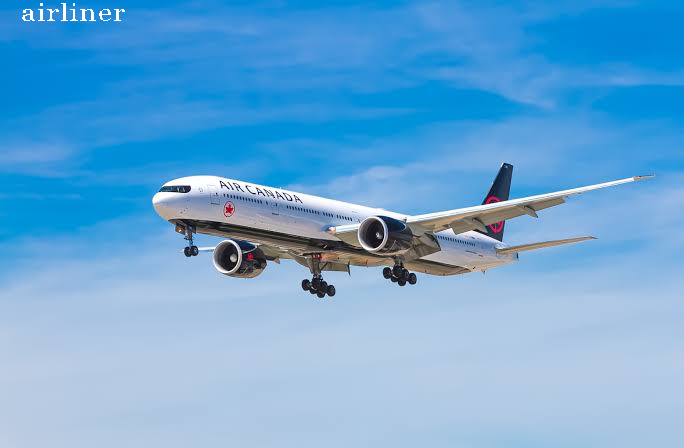

In [ ]:
# display the image, together with its label
disp_img = cv2.imread(img_path)
cv2.putText(disp_img, actual_prediction[0][0][1], (20, 20), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255,255,255))
cv2_imshow(disp_img)

## **ResNet**

This model is more lightweight, but gives the same results. Learning is aided by introducing skip connections between every fel convolutional/pooling layers, that by default (i.e. when all weights are put to zero) learn identity mapping, instead to a trivial one. 

In [ ]:
# load the image to predict
img_path = '/content/drive/MyDrive/cv/test5.jpg'
img = load_img(img_path)

In [ ]:
# resize the image
img = img.resize((224, 224))
img_array = img_to_array(img)

In [ ]:
# add the batch dimension
img_array = np.expand_dims(img_array, axis=0)
img_array = imagenet_utils.preprocess_input(img_array)

In [ ]:
# download ResNet
pretrained_model = ResNet50(weights='imagenet')

In [ ]:
# this is a 1000-dimensional array of probabilities -- decode_predictions will give the actual class
prediction = pretrained_model.predict(img_array)
actual_prediction = imagenet_utils.decode_predictions(prediction)
print("the predicted object is: " + actual_prediction[0][0][1] + ", with accuracy: " + str(actual_prediction[0][0][2]))

the predicted object is: airliner, with accuracy: 0.8241308


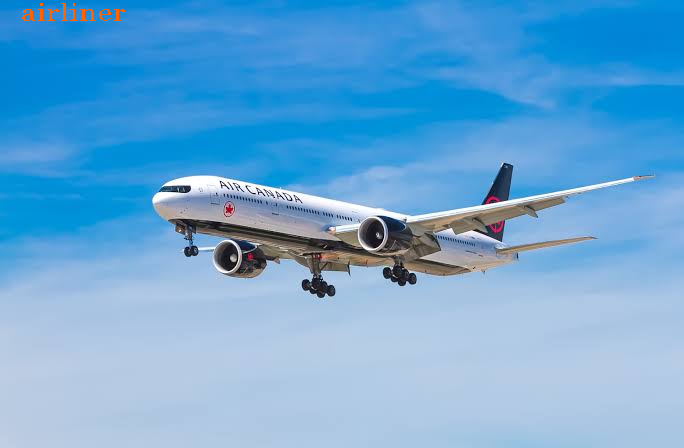

In [ ]:
# display the image, together with its label
disp_img = cv2.imread(img_path)
cv2.putText(disp_img, actual_prediction[0][0][1], (20, 20), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (0,100,255))
cv2_imshow(disp_img)

# **GoogLeNet (inception)**

There are a few unusual features that appear in this model. First off, there is local response normalization, which forces the different convolution maps to learn different features 

$b_i = a_i (k + \alpha \sum_{j_{lo}}^{j_{hi}} a^2_j)^{-\beta}$

$j_{hi} = \min(i + \frac{r}{2}, f_n - 1),\,\,\, j_{lo} = \max(0, i-\frac{r}{2})$

$b_i$ is the output of the neuron ($a_i$ is the input), located at pixel $u$ and $v$ in the feature map i (only neurons from different feature maps, located at this particular position are considered in this note). Notation:

* $k, \alpha, \beta$ and $r$ are hyperparameters. $k$ is called the bias, $r$ -- the depth radius
* $f_n$ -- number of feature maps

E.g. if $r = 2$, a strongly activated neurons will inhibit the ativation of neurons immediately above and below it. E.g. in AlexNet, the hyperparameters are chosen as: $r = 2,\, \alpha = 2\times 10^{-5},\, \beta=0.75,\, k=1$. 

One can implement local response normalization with the **tf.nn.local_response_normalization()** function (one needs to wrap with a Lambda layer to use it with Keras).
